In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../datasets/airline_passengers.csv', index_col='Month', parse_dates=True)


In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


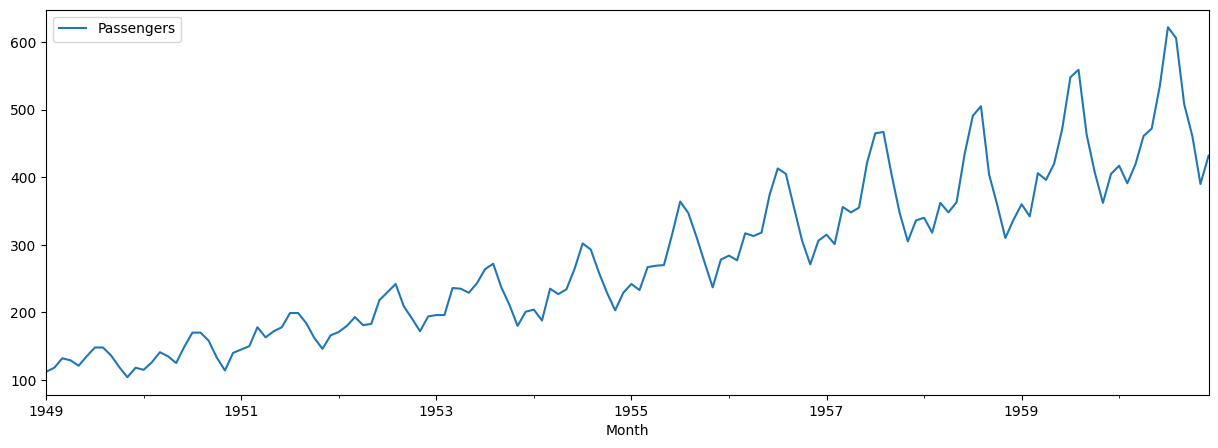

In [5]:
df.plot(figsize=(15, 5));

In [6]:
df['1stdiff'] = df['Passengers'].diff()

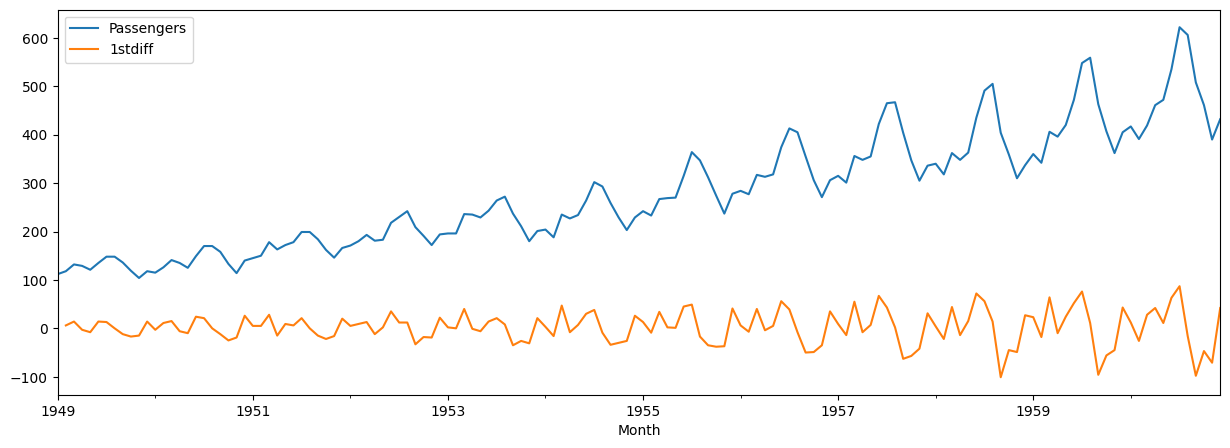

In [7]:
df.plot(figsize=(15, 5));

In [8]:
df['LogPassengers'] = np.log(df['Passengers'])

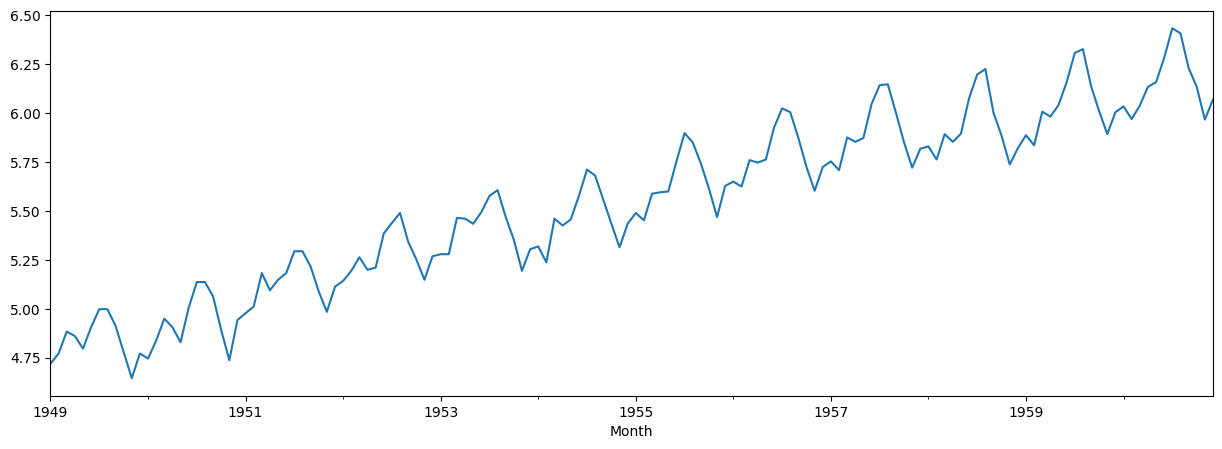

In [9]:
df['LogPassengers'].plot(figsize=(15, 5));

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [12]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [13]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [14]:
arima_result = arima.fit()

In [15]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])

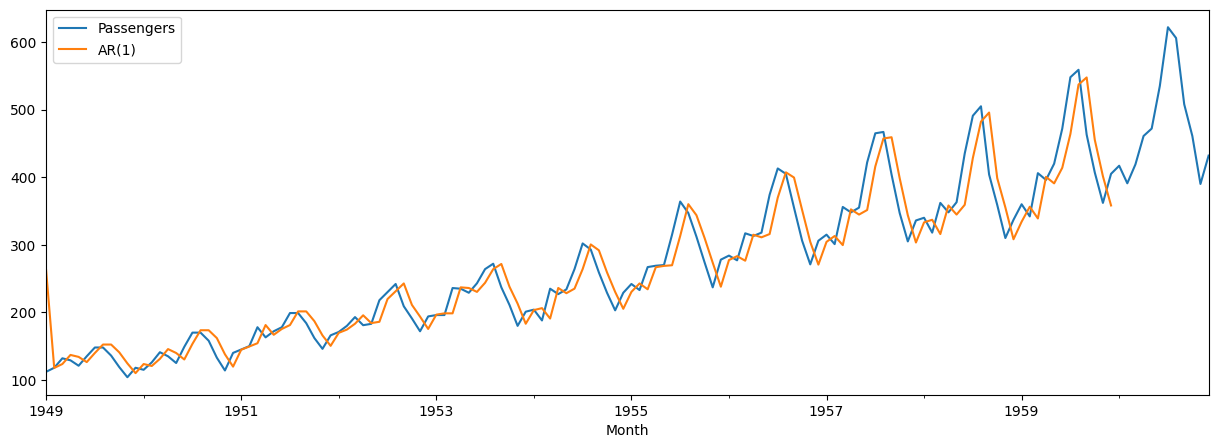

In [16]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [17]:
prediction_result = arima_result.get_forecast(Ntest)## it returns an object  not values 
forecast = prediction_result.predicted_mean## wwe access the value of the prediction
df.loc[test_idx, 'AR(1)'] = forecast

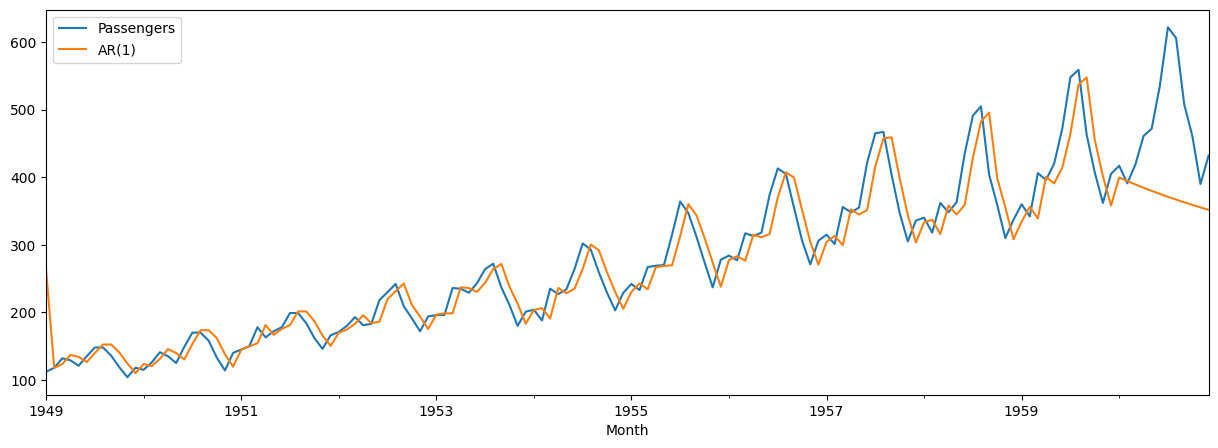

In [18]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [19]:
# Explore prediction result further
type(prediction_result)# es un wrapper object 

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [20]:
# Confidence interval we obtain our confident interval 
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [21]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

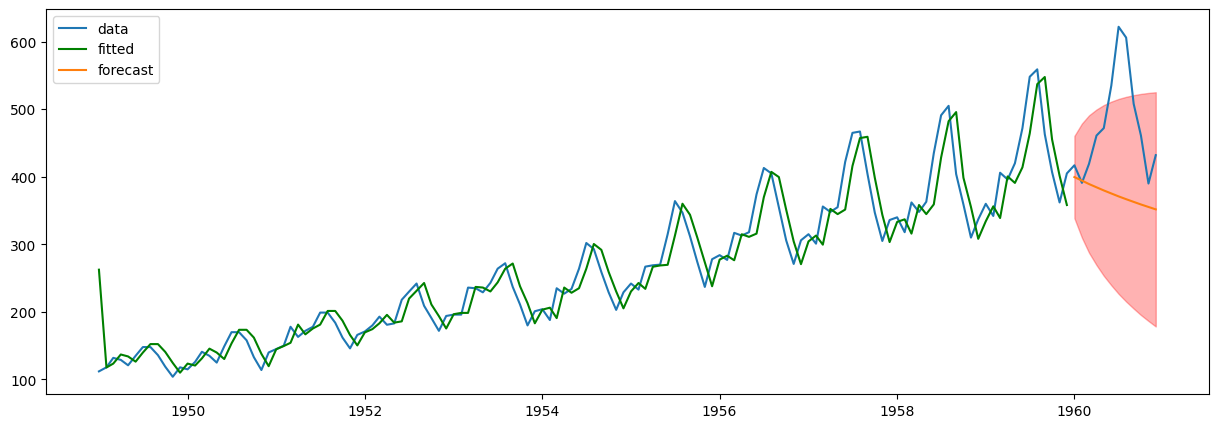

In [22]:
plot_fit_and_forecast(arima_result)

C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


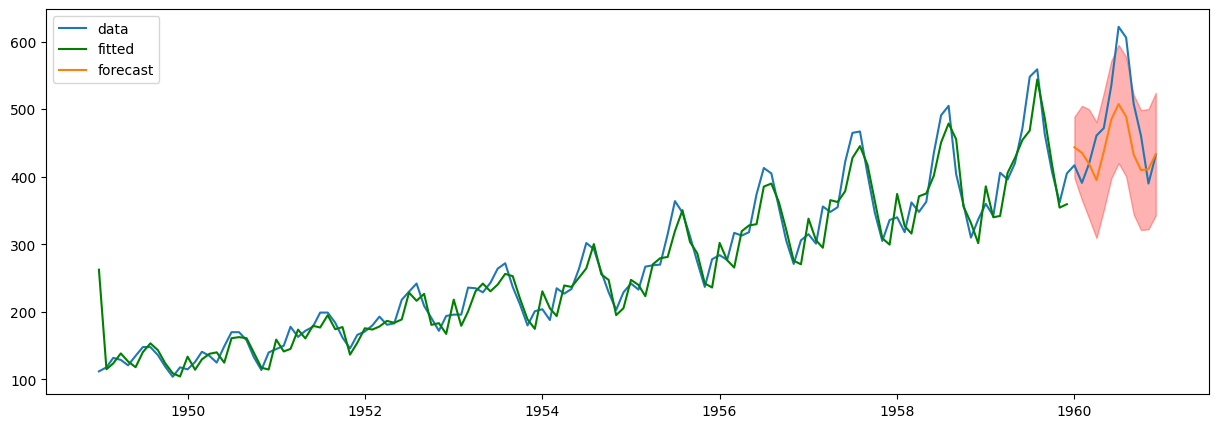

In [23]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


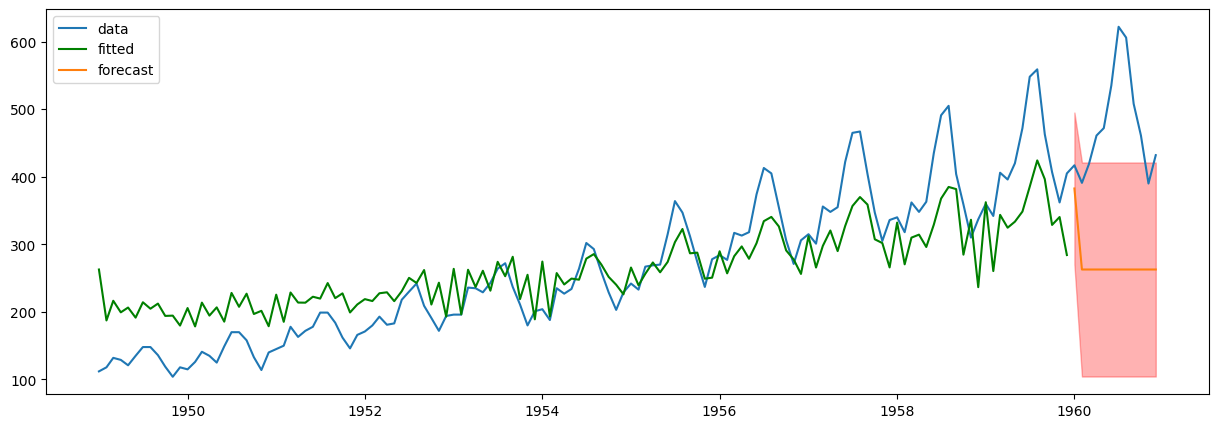

In [24]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

We apply a logarithm to a time series to stabilize its variance and make the data more predictable. When a time series shows exponential growth or large fluctuations, taking the log helps compress the scale of the data, making it easier to model. It reduces the impact of extreme values and makes patterns more consistent over time. In simpler terms, it helps "smooth out" the data, so trends and relationships become clearer, and the model can make better forecasts. It’s especially useful when the data has a large range or growth that increases over time.


In [33]:
df['Log1stDiff'] = df['LogPassengers'].diff()

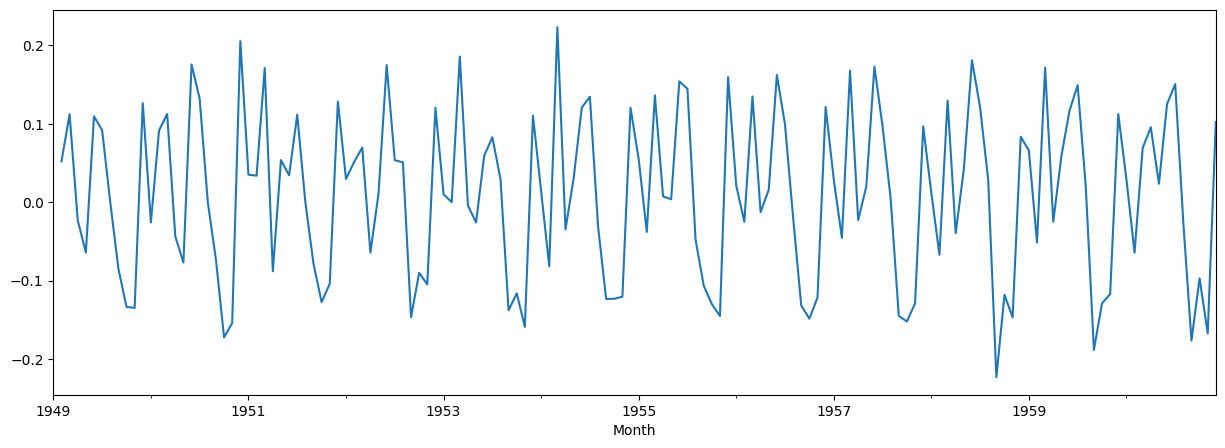

In [34]:
df['Log1stDiff'].plot(figsize=(15, 5));

We're going to create another function because we're using differencing, which involves subtracting each value from its previous value. As a result, we'll have to exclude the first value of the time series, since there's no previous value to subtract from it.


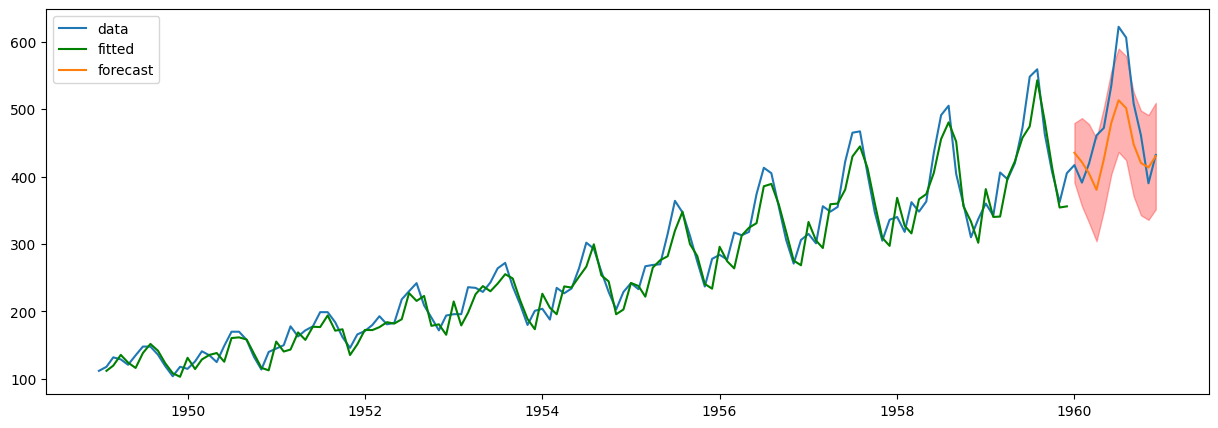

In [27]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

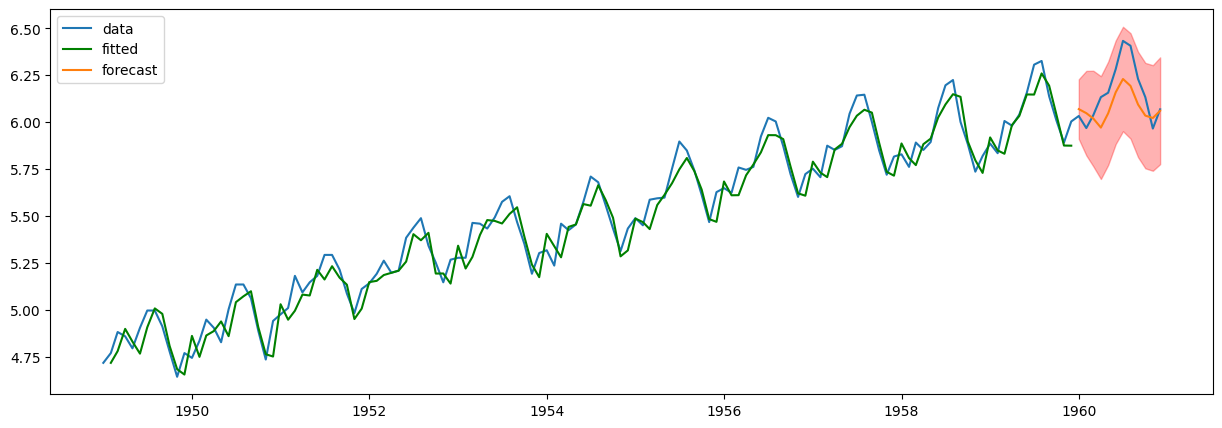

In [28]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


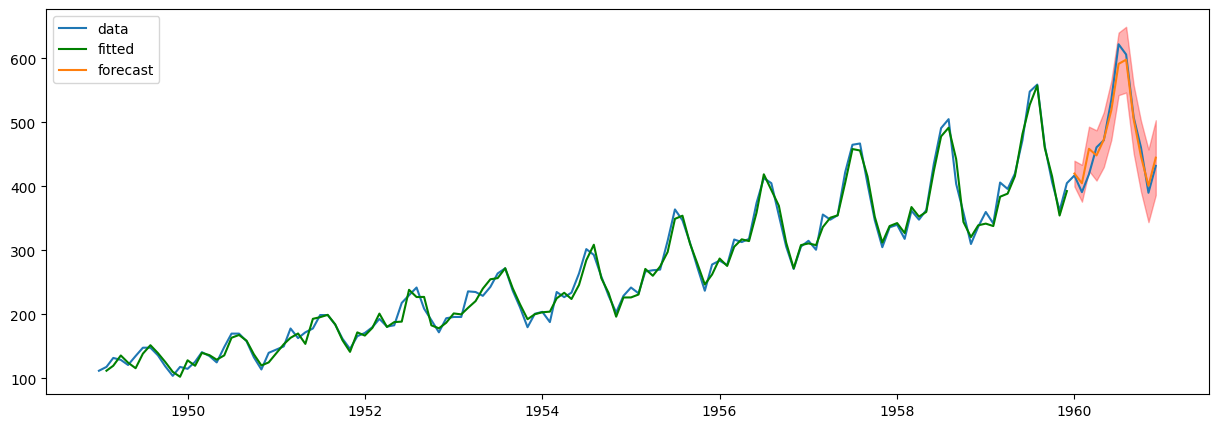

In [29]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

C:\Users\ASUS TUF\.conda\envs\proyecto_machin_learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


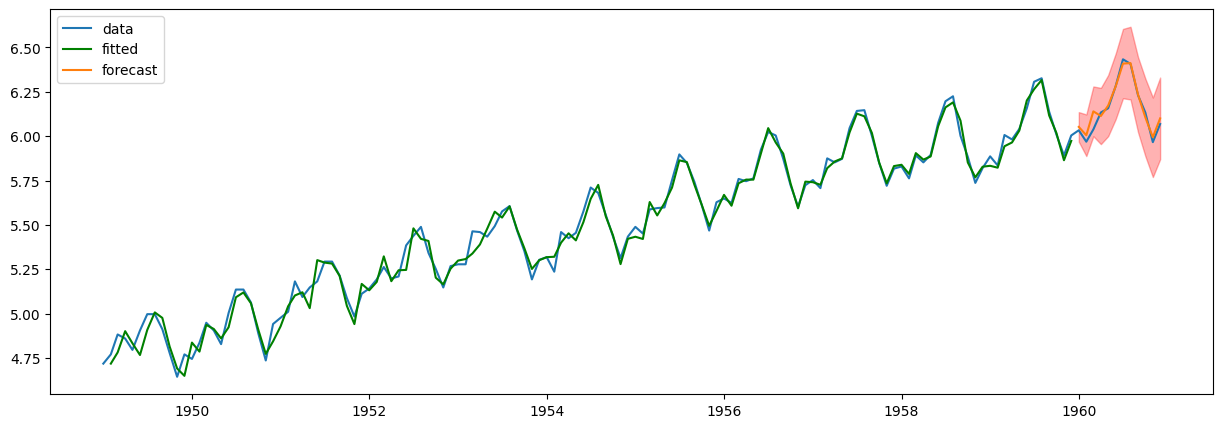

In [30]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [31]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [32]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06458785955301
ARIMA(8,1,1) logged: 61.606263910159896
ARIMA(12,1,0): 17.54302637026354
ARIMA(12,1,0) logged: 16.118723302831864
